In [90]:
# basic imports

%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import data

df = pd.read_csv('C:/Users/jafon\Documents/PythonMaterials/Data/google-play-store-apps/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Goal:

1. Select an outcome (y) variable
2. Pick four or five (x) variables (mixture of categorical and continuous) to act as features.
3. Explore the features (graph?)
4. From there, create ten "new" features. Explain the reasoning behind each one.

c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


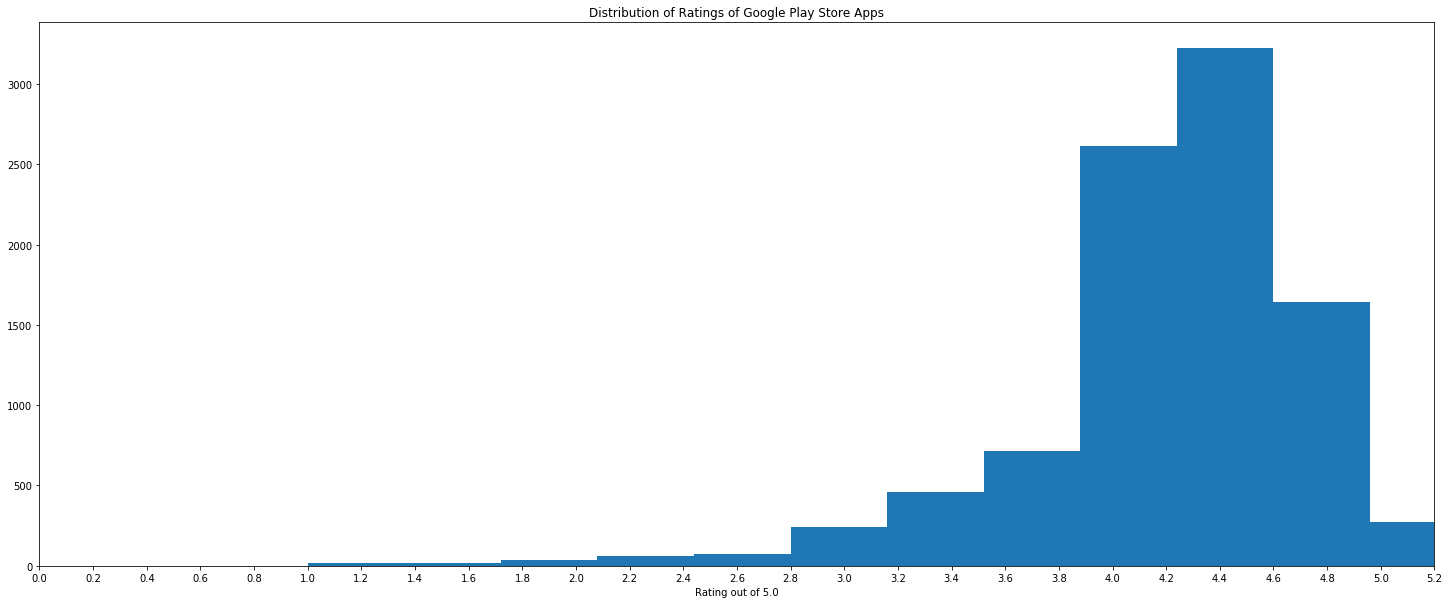

In [4]:
# Goal will be "Rating" in df.Rating - I want to see which features affect rating.

# features will be reviews (continuous), content rating (cat), size (cont), installs(cont)

plt.figure(figsize=(25,10))
plt.hist(df.Rating, bins=50)
plt.xlim(0,5.2)
plt.xticks(np.arange(0, 5.4, step=0.2))
plt.title('Distribution of Ratings of Google Play Store Apps')
plt.xlabel('Rating out of 5.0')

plt.rcParams.update({'font.size': 15})

plt.show()

In [5]:
for i in df['Size'] == 'Varies with devic': # This error was causing me outrageous problems (see below cell)
    i=float(1)

In [45]:
df['Size2'] = df['Size']

In [48]:
df['Size2'] = (df['Size2'].replace(r'Varies with Device?$', '1', regex=True))

               

In [47]:
df['Size2']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
5                      5.6M
6                       19M
7                       29M
8                       33M
9                      3.1M
10                      28M
11                      12M
12                      20M
13                      21M
14                      37M
15                     2.7M
16                     5.5M
17                      17M
18                      39M
19                      31M
20                      14M
21                      12M
22                     4.2M
23                     7.0M
24                      23M
25                     6.0M
26                      25M
27                     6.1M
28                     4.6M
29                     4.2M
                ...        
10811                  3.9M
10812                   13M
10813                  2.7M
10814                   31M
10815               

In [49]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return float(x)
    if 'K' in x:
        return float(x.replace('K', '')) * 1000
    if 'M' in x:
        return float(x.replace('M', '')) * 1000000
    
df['Size2'] = df['Size2'].apply(value_to_float)


In [53]:
# finding the average to use for 'varies with devices'
dfsizetemp = [i for i in df['Size2'] if i != 1]
dfsizeavg = np.nanmean(dfsizetemp)
dfsizeavg

22270540.265035678

In [54]:
# imputing the average and replacing varies with devices with said average
df['Size2'] = [dfsizeavg if i == 1 else i for i in df['Size2']]

In [55]:
type(df.Installs[1])

str

In [57]:
df['Installs'] = df['Installs'].apply(lambda x: x.split()[0].replace('+', '')) # taking out the pluses at end of numbers
df['Installs'] = df['Installs'].apply(lambda x: x.split()[0].replace(',', '')) # taking out commas in numbers

In [56]:
# Now to fix installs:

for i in df['Installs']:
    if i == 'Free':
        i = 0 # ASK MENTOR why this does not work

In [58]:
for i in df['Installs']:
    if i == 'Free':
        i = 0
    else:
        float(i) # this didn't work because I didn't overwrite it to i = float(i) - fixed in later cells
        
print(df[df['Installs'] == 'Free'])

                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  Size2  
10472       1.0.19  4.0 and up         NaN    NaN  


In [61]:
df['Installs'] = df['Installs'].str.replace('Free', '0')
df['Installs'] = [0 if x == '0' else x for x in df['Installs']]
print(df[df['Installs'] == 'Free'])


Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver, Size2]
Index: []


ValueError: cannot convert float NaN to integer

In [64]:
df['Installs'] = [float(i) for i in df['Installs']]
type(df['Installs'][5]) # note to self - ***can*** convert to float with nans, 
# ***cannot*** convert to int with nan's

numpy.float64

In [91]:
# see? practically harmless!

# The remaining columns to fix: reviews and content rating

type(df['Reviews'][1])

str

In [84]:
df['Reviews2'] = df['Reviews'] # will replace back when done just so I don't screw up the original data

In [85]:
def string_to_float(x):
    if 'K' in x:
        return float(x.replace('K', '')) * 1000
    elif 'M' in x:
        return float(x.replace('M', '')) * 1000000
    else:
        return float(x)
    
df['Reviews2'] = df['Reviews2'].apply(string_to_float)
        


In [86]:
# final check before moving onto content rating

print(type(df['Rating'][1]))   #good!
print(type(df['Reviews2'][1])) #good!
print(type(df['Size2'][1]))    #good!
print(type(df['Installs'][1])) #good!

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [70]:
ratingaverage = np.mean(df['Rating'])

In [71]:
# fixing bogus rating values
for (indx, i) in enumerate(df['Rating']):
    if i > 5:
        df['Rating'][indx] = ratingaverage

c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [74]:
dfcontentmean = df.groupby('Content Rating')['Rating'].mean().reset_index()
dfcontentstd = df.groupby('Content Rating')['Rating'].std().reset_index()
dfcontentstd

,Content Rating,Rating
0,Adults only 18+,0.435890
1,Everyone,0.537377
2,Everyone 10+,0.367259
3,Mature 17+,0.505765
4,Teen,0.391595
5,Unrated,NaN


In [76]:
dfcontentmean.columns=['Content Rating', 'Rating Average']
dfcontentstd.columns = ['Content Rating', 'Stan.Dev.']
dfcontent = pd.merge(dfcontentmean, dfcontentstd)
dfcontent

,Content Rating,Rating Average,Stan.Dev.
0,Adults only 18+,4.300000,0.435890
1,Everyone,4.186375,0.537377
2,Everyone 10+,4.257179,0.367259
3,Mature 17+,4.123427,0.505765
4,Teen,4.233487,0.391595
5,Unrated,4.100000,NaN


In [77]:
dfcontent['Stan.Dev.'][5] = 0 # NaN's are the bane of my existence

c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.Reviews2.head()

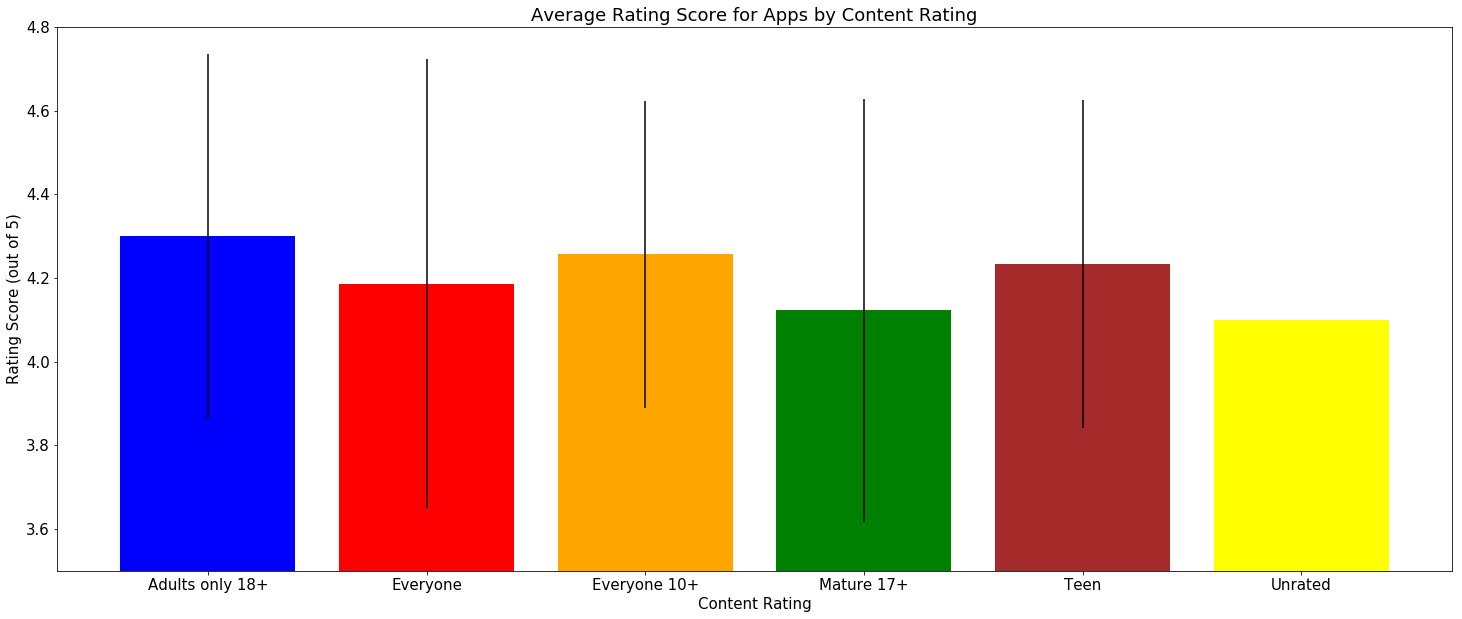

In [80]:
plt.figure(figsize=(25,10))
plt.bar(x=dfcontent['Content Rating'], height=dfcontent['Rating Average'], yerr=dfcontent['Stan.Dev.'],
       color=('blue', 'red', 'orange', 'green', 'brown', 'yellow'))
plt.ylim(3.5,4.8)
plt.ylabel('Rating Score (out of 5)')
plt.xlabel('Content Rating')
plt.title('Average Rating Score for Apps by Content Rating')
plt.show()

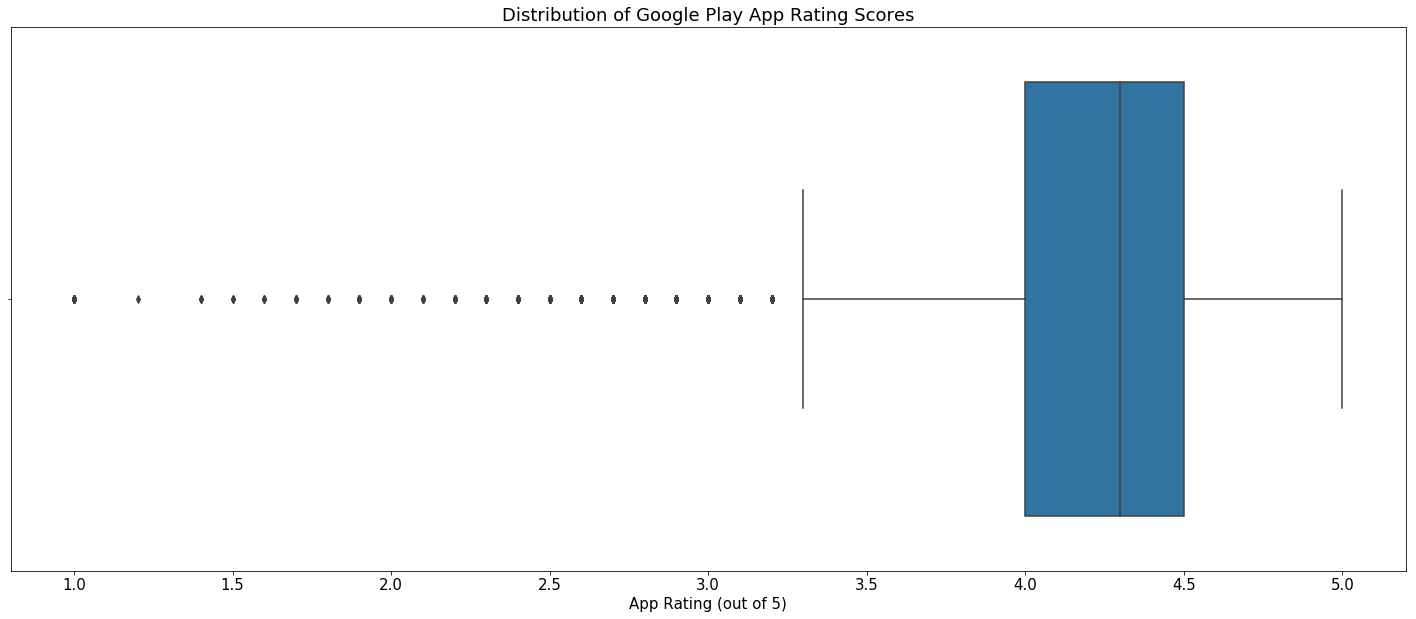

The average app rating is 4.191757589229782 +/- 0.5151638523257039


In [81]:
plt.figure(figsize=(25,10))
sns.boxplot(x=df['Rating'])
plt.xlabel('App Rating (out of 5)')
plt.title('Distribution of Google Play App Rating Scores')
plt.show()
print('The average app rating is {} +/- {}'.format(np.mean(df['Rating']), np.std(df['Rating'])))

          Installs     Size2    Rating  Reviews2
Installs  1.000000  0.162548  0.051355  0.643109
Size2     0.162548  1.000000  0.075788  0.237280
Rating    0.051355  0.075788  1.000000  0.068139
Reviews2  0.643109  0.237280  0.068139  1.000000


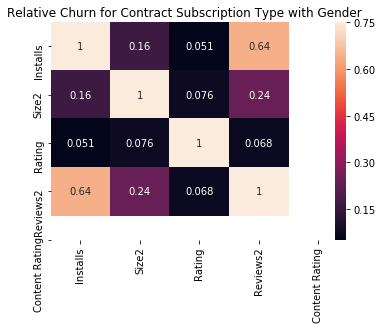

In [92]:
# clearly hundreds of people escaped the max 5 out of 5 score

# creating heatmap
dffeatures = df[['Installs', 'Size2', 'Rating', 'Reviews2', 'Content Rating']].copy()
corr = dffeatures.corr()

print(corr)

ax = sns.heatmap(corr, xticklabels=dffeatures.columns, 
                 yticklabels=dffeatures.columns, vmax=.75, annot=True)
plt.title('Relative Churn for Contract Subscription Type with Gender')
plt.show()

In [93]:
#combining features - installs x content rating//installs x reviews

dfinstallcontentmix = df.groupby('Content Rating')['Installs'].mean().reset_index()
dfinstallratingmix = df.groupby('Content Rating')['Rating'].mean().reset_index()
dfinstallandrating = pd.merge(dfinstallcontentmix, dfinstallratingmix)
dfinstallandrating

,Content Rating,Installs,Rating
0,Adults only 18+,6.666667e+05,4.300000
1,Everyone,1.311844e+07,4.186375
2,Everyone 10+,3.204330e+07,4.257179
3,Mature 17+,1.107112e+07,4.123427
4,Teen,2.878636e+07,4.233487
5,Unrated,2.525000e+04,4.100000


In [103]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size2,Reviews2
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19000000.0,159.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14000000.0,967.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8700000.0,87510.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25000000.0,215644.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2800000.0,967.0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,5600000.0,167.0
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000.0,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,19000000.0,178.0
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000.0,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,29000000.0,36815.0
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,33000000.0,13791.0
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000.0,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,3100000.0,121.0


In [104]:
# to create a number of new features:

# Using cross of price and number of reviews as new features
# using 10000 reviews as cutoff


dffreehighreview = df[(df.Price == '0') & (df.Reviews2 >= 10000)]
dffreelowreview = df[(df.Price == '0') & (df.Reviews2 < 10000)]
dfnotfreehighreview = df[(df.Price != '0') & (df.Reviews2 >= 10000)]
dfnotfreelowreview = df[(df.Price != '0') & (df.Reviews2 < 10000)]

In [105]:
# based on the above - to finish this betch off!

# using 100k installs as the cutoff
dfeveryonehighinstall = df[(df['Content Rating'] == 'Everyone') & (df.Installs > 100000)]
dfeveryonelowinstall = df[(df['Content Rating'] == 'Everyone') & (df.Installs <= 100000)]

dfteenhighinstall = df[(df['Content Rating'] == 'Teen') & (df.Installs > 100000)]
dfteenlowinstall = df[(df['Content Rating'] == 'Teen') & (df.Installs <= 100000)]

dfadultshighinstall = df[(df['Content Rating'] == 'Adults only 18+') & (df.Installs > 100000)]
dfadultslowinstall = df[(df['Content Rating'] == 'Adults only 18+') & (df.Installs <= 100000)]

In [108]:
# The above totals 10 new features.
# preparing the above dataframes for correlations (see below cell for reason why)
# for the record, I am skipping the first four because I need to convert Price into float and I am not dealing with that again

dfeveryonehighinstallcorr = dfeveryonehighinstall[['Rating', 'Installs']].copy()
dfeveryonelowinstallcorr = dfeveryonelowinstall[['Rating', 'Installs']].copy()
dfteenhighinstallcorr = dfteenhighinstall[['Rating', 'Installs']].copy()
dfteenlowinstallcorr = dfteenlowinstall[['Rating', 'Installs']].copy()
dfadultshighinstallcorr = dfadultshighinstall[['Rating', 'Installs']].copy()
dfadultslowinstallcorr = dfadultslowinstall[['Rating', 'Installs']].copy()


In [111]:
# filtering method - create a corr and then find the one with the highest coefficient

print(dfeveryonehighinstallcorr.corr())
print(dfeveryonelowinstallcorr.corr())
print(dfteenhighinstallcorr.corr())
print(dfteenlowinstallcorr.corr())
print(dfadultshighinstallcorr.corr())
print(dfadultslowinstallcorr.corr())

            Rating  Installs
Rating    1.000000  0.048326
Installs  0.048326  1.000000
            Rating  Installs
Rating    1.000000 -0.002581
Installs -0.002581  1.000000
            Rating  Installs
Rating    1.000000  0.010641
Installs  0.010641  1.000000
            Rating  Installs
Rating    1.000000 -0.082404
Installs -0.082404  1.000000
           Rating  Installs
Rating    1.00000   0.39736
Installs  0.39736   1.00000
          Rating  Installs
Rating       NaN       NaN
Installs     NaN       NaN


In [ ]:
# welp, looks like I'm taking the last feature out!

# filtering-wise, there is a higher correlation (i.e., filtering-score) for the adult high install. The rest of the features
# don't have a significant correlation - would need to look into other variables